Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 9**: One challenge in astronomy is to find the trajectory of a light object in the presence of two much heavier bodies whose motion is not influenced by the light object. The typical case would be the motion of a satellite in the Earth-Moon system.

If all three objects move in the $x-y$ plane, the motion of the light object is described by dimensionless, second-order  ODE's $$\frac{d^{2}x(t)}{dt^{2}}=x(t)+2\,\frac{dy(t)}{dt}-\frac{(1-\mu)\,(x(t)+\mu)}{r^{3}}-\frac{\mu\,(x(t)-1+\mu)}{s^{3}}$$ and $$\frac{d^{2}y(t)}{dt^{2}}=y(t)-2\,\frac{dx(t)}{dt}-\frac{(1-\mu)\,y(t)}{r^{3}}-\frac{\mu\,y(t)}{s^{3}},$$ where $\mu$ is the ratio of masses of the heavy objects, $x(t)$ and $y(t)$ are the coordinates of the light object and $$r=\sqrt{(x(t)+\mu)^{2}+y(t)^{2}}\quad{};\;s=\sqrt{(x(t)-1+\mu)^{2}+y(t)^{2}}.$$

**Data**: Consider the time interval $0\leq{}t\leq{}18$ and $\mu=0.01227471$ (Moon to Earth ratio) and initial conditions $x(0)=0.994$, $y(0)=0$, $\frac{dx(t=0)}{dt}=0$ and $\frac{dy(0)}{dt}=-2.0015851$.

**Task**: Write a function `satellite(init, time, mu)` to solve the ODE's. The array of initial conditions, the time array and the parameter $\mu$ shall be input to the function. Return the full output of the `odeint` function.

Create three plots: **(a)** draw the trajectory coordinate $y(t)$ against $x(t)$, 

**(b)** draw both curves $x(t)$ and $y(t)$ as a function of time on the same plot with a legend and 

**(c)** draw the speeds $dy(t)/dt$ against $dx(t)/dt$. 

All figures should show appropriate axes labels and be drawn as a row$=1$, column$=3$ multi-figure plot.

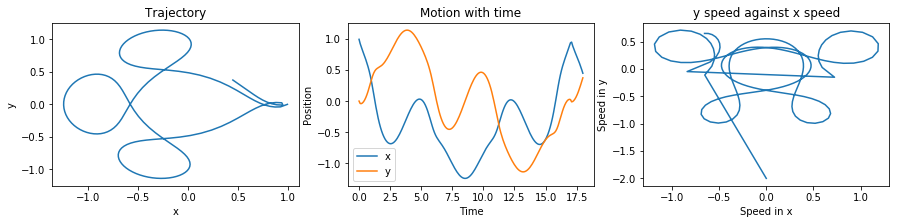

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def func(y, time, mu):
    r = np.sqrt((y[0]+mu)**2+(y[2])**2)
    s = np.sqrt((y[0]+mu-1)**2+(y[2])**2)
    f0 = y[1]
    f1 = y[0]+2*y[3]-(((1-mu)*(y[0]+mu))/(r**3))-((mu*(y[0]+mu-1))/(s**3))
    f2 = y[3]
    f3 = y[2]-2*y[1]-(((1-mu)*(y[2]))/(r**3))-((mu*(y[2]))/(s**3))
    return np.array([f0, f1, f2, f3])

def satellite(init, time, mu):
    return odeint(func, init, time, args=(mu, ))

mu = 0.01227471
time = np.linspace(0, 18, 200)
x0 = 0.994
y0 = 0
dx0dt = 0
dy0dt = -2.0015851

arrayofcoordinates = satellite(np.array([x0, dx0dt, y0, dy0dt]), time, mu)

x = arrayofcoordinates[ :,0]
y = arrayofcoordinates[ :,2]
dxdt = arrayofcoordinates[ :,1]
dydt = arrayofcoordinates[ :,3]

fig = plt.figure(figsize=(15,3))

plt.subplot(1, 3, 1)
plt.plot(x, y)
plt.title('Trajectory')
plt.ylabel('y')
plt.xlabel('x')

plt.subplot(1, 3, 2)
plt.plot(time, x, label='x')
plt.plot(time, y, label='y')
plt.title('Motion with time')
plt.ylabel('Position')
plt.xlabel('Time')
plt.legend(loc='best')

plt.subplot(1, 3, 3)
plt.plot(dxdt, dydt)
plt.title('y speed against x speed')
plt.ylabel('Speed in y')
plt.xlabel('Speed in x')

plt.show()

In [5]:
# Test cell
mu = 0.01227471
init = np.array([0.994, 0.0, 0.0, -2.0015851]) # x(0), dxdt(0), y(0), dydt(0)
time = np.linspace(0, 18, 200)
answer = satellite(init, time, mu)
assert (answer[10,0]>0.4 and answer[10,0]<0.41), 'wrong x(t)'

In [6]:
# Test cell
assert (answer[10,1]>-0.91 and answer[10,1]<-0.9), 'wrong speed in x'
assert (answer[10,2]>0.28 and answer[10,2]<0.29), 'wrong y(t)'
assert (answer[10,3]>0.7 and answer[10,3]<0.72), 'wrong speed in y'

### Tests 3 marks; Style 1 mark; Plots - 3 marks